In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import odeint

In [2]:
fontsize= 12
ticksize = 14
figsize = (10, 4.5)
params = {'font.family':'serif',
    "figure.figsize":figsize,
    'figure.dpi': 80,
    'figure.edgecolor': 'k',
    'font.size': fontsize,
    'axes.labelsize': fontsize,
    'axes.titlesize': fontsize,
    'xtick.labelsize': ticksize,
    'ytick.labelsize': ticksize
}
plt.rcParams.update(params)

In [3]:
# Parameters
α = 1.0/3
ρ = 0.1111
δ = 0.1
k_0 = 1.0

In [4]:
# Defining the production function and the derivative of the production function
def f(k):
    return k**α

def f_prime(k):
    return  α*(k**(α -1))

In [5]:
# defining the steady states
k_star= ((δ+ρ)/α)**(1.0/(α - 1))
c_star = f(k_star)-δ*k_star

k_tilde_max = (δ)**(1/(α-1))
c_tilde_max = 0

In [6]:
# Defining the grids  and vector fields

k_grid, c_grid = np.meshgrid(np.linspace(0.1,32,15),np.linspace(0,2,10))

dcdt = c_grid*(f_prime(k_grid)-(δ+ρ))
dkdt = f(k_grid)-δ*k_grid-c_grid

magnitude = np.sqrt(dcdt**2 + dkdt**2)


dcdt_normalized = dcdt/magnitude
dkdt_normalized = dkdt/magnitude

In [7]:
# Solutions
def dg_dt(kc, t):
    return f(kc[0])-δ*kc[0] - kc[1], kc[1]*(f_prime(kc[0])- (δ+ρ)) #first one is \dot{k} and the second one is \dot{c}

ts = np.linspace(0, 50, 100)
kc0_below = [k_0,0.6954047] #Be careful the c(0) = 0.6954047 is only for these parameters, you have to change it if you change the parameters of the problem
sol_below = odeint(dg_dt, kc0_below, ts)
c_path_shoot_below = sol_below[:,1]
k_path_shoot_below = sol_below[:,0]

## Solutions violating TVC
kc0_1 = [1,0.5] 
sol_1 = odeint(dg_dt, kc0_1, ts)
c_path_1 = sol_1[:,1]
k_path_1 = sol_1[:,0]

kc0_2 = [1, 0.3] 
sol_2 = odeint(dg_dt, kc0_2, ts)
c_path_2 = sol_2[:,1]
k_path_2 = sol_2[:,0]



#### Plotting

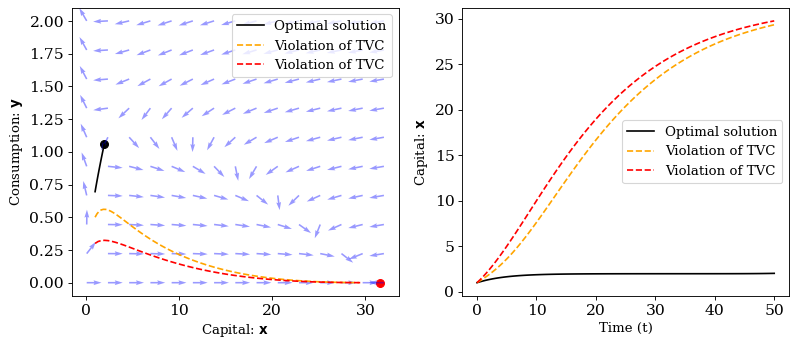

In [15]:
plt.subplot(1, 2, 1)
plt.ylabel(r"Consumption: $\mathbf{y}$")
plt.xlabel(r"Capital: $\mathbf{x}$")


plt.scatter(k_star,c_star,color = 'k', s = 50)
plt.scatter(k_tilde_max,c_tilde_max,color = 'r', s = 50)
plt.quiver(k_grid,c_grid,dkdt_normalized,dcdt_normalized, color ='blue', alpha = 0.4)
plt.plot(k_path_shoot_below,c_path_shoot_below, color = 'k', label = 'Optimal solution')

plt.plot(k_path_1,c_path_1, color = 'orange', linestyle='--', label= "Violation of TVC")

plt.plot(k_path_2,c_path_2, color = 'r', linestyle='--', label= "Violation of TVC")
plt.legend(loc= 'upper right')


plt.subplot(1, 2, 2)
plt.ylabel(r"Capital: $\mathbf{x}$")
plt.xlabel(r"Time (t)")
plt.plot(ts,k_path_shoot_below, color = 'k', label = 'Optimal solution')
plt.plot(ts,k_path_1, color = 'orange', linestyle='--', label= "Violation of TVC")
plt.plot(ts,k_path_2, color = 'r', linestyle='--', label= "Violation of TVC")

plt.legend(loc= 'center right')
plt.tight_layout()

#plt.savefig('TVC_violation.pdf')
